In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.api as sm
from statsmodels.formula.api import ols
import seaborn as sns
import scipy.stats as stats

pd.set_option('display.max_columns', 500)


In [2]:
df = pd.read_csv('/Users/regi/Flatiron/mod4_project/cleaned_data/final_df.csv')

In [3]:
df['County_index'] = df['CHSI_County_Name'] + ', ' + df['CHSI_State_Abbr']

In [4]:
df.head()

,State_FIPS_Code,County_FIPS_Code,CHSI_County_Name,CHSI_State_Name,CHSI_State_Abbr,Population_Size,Poverty,Age_19_Under,Age_19_64,Age_65_84,Age_85_and_Over,White,Black,Native_American,Asian,Hispanic,Pop_proportion,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Uninsured,County_index
0,1,1,Autauga,Alabama,AL,48612,10.4,26.9,62.3,9.8,0.9,80.7,17.3,0.5,0.6,1.7,0.016400,27.800,78.60,24.500000,29.1,26.600000,14.2,11.70,"Autauga, AL"
1,1,3,Baldwin,Alabama,AL,162586,10.2,23.5,60.3,14.5,1.8,88.4,9.9,0.5,0.4,2.3,0.054852,27.200,76.20,23.600000,30.5,24.600000,7.2,12.18,"Baldwin, AL"
2,1,5,Barbour,Alabama,AL,28414,22.1,24.3,62.5,11.6,1.6,52.2,46.8,0.4,0.3,3.1,0.009586,29.795,80.08,25.600000,31.6,17.700000,6.6,18.04,"Barbour, AL"
3,1,7,Bibb,Alabama,AL,21516,16.8,24.6,63.3,10.9,1.2,76.8,22.5,0.3,0.1,1.4,0.007259,29.795,86.60,26.897561,31.6,23.822917,13.1,15.41,"Bibb, AL"
4,1,9,Blount,Alabama,AL,55725,11.9,24.5,62.1,12.1,1.3,97.1,1.5,0.5,0.2,6.3,0.018800,33.500,74.60,24.200000,31.6,23.600000,8.4,14.59,"Blount, AL"


In [5]:
num_cols = ['Poverty', 'Age_19_Under', 'Age_19_64', 'Age_65_84', 'Age_85_and_Over', 'White',
       'Black', 'Native_American', 'Asian', 'Hispanic',
       'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker',
       'Diabetes', 'Uninsured' ]

In [6]:
# for col in num_cols:
#     df[col] = df[col] / 100

In [7]:
# all of the following have 6 predictor parameters: (excluding uninsured for now due to colinearity with Poverty)
# [Poverty, No_Exercise, Few_Fruit_Veg, Obesity, High_Blood_Pres, Smoker]
# dfp - dataset in unweighted proportions/percentages - format 1 = 1%
# dfpercent - dataset in unweighted proportions/percentages - format 0.01 = 1%
# dfpcat - dataset in unweighted proportions/percentages - format 1 = 1% with categorical region data
# dfpw - dataset in weighted proportions/percentages
# dfabs - dataset in unweighted absolute values 
# dfabsw - dataset in weighted absolute values 

In [6]:
# make dfp
dfp_all = df.copy(deep=True)
dfp = dfp_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
               'High_Blood_Pres', 'Smoker', 'Diabetes']]

In [9]:
# # make dfpercent
# dfpercent_all = df.copy(deep=True)
# for col in num_cols:
#     dfpercent_all[col] = dfpercent_all[col] / 100
# dfpercent = dfpercent_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
#                'High_Blood_Pres', 'Smoker', 'Diabetes']]

In [7]:
# make dfpcat 
dfpcat_all = df.copy(deep=True)
regions = pd.read_csv('https://raw.githubusercontent.com/cphalpert/census-regions/master/us%20census%20bureau%20regions%20and%20divisions.csv')
dummy = pd.get_dummies(regions['Region'])
dummy = dummy.iloc[:,1:]
region = regions.merge(dummy, left_index=True, right_index=True)
dfpcat_all = dfpcat_all.merge(region, left_on='CHSI_State_Name', right_on='State')

dfpcat = dfpcat_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
               'High_Blood_Pres', 'Smoker', 'Diabetes', 'Northeast', 'South', 'West']]


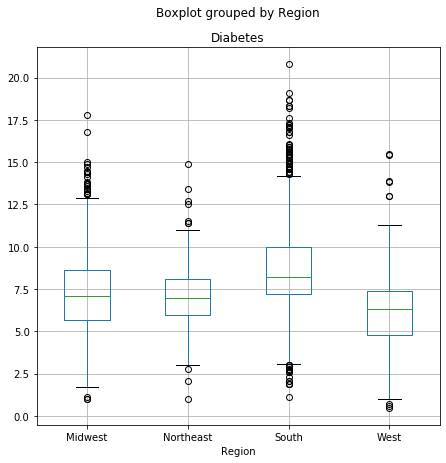

In [8]:
dfpcat_all.boxplot('Diabetes',by = 'Region',figsize = (7,7))

In [9]:
# # make dfpercentcat 
# dfpercentcat_all = dfpcat_all.copy(deep=True)
# for col in num_cols:
#     dfpercentcat_all[col] = dfpercentcat_all[col] / 100
# dfpercentcat = dfpcat_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
#                'High_Blood_Pres', 'Smoker', 'Diabetes', 'Northeast', 'South', 'West']]

In [10]:
# make dfpw
dfpw_all = df.copy(deep=True)
for col in num_cols:
    dfpw_all[col] = dfpw_all[col] * dfpw_all['Pop_proportion']
dfpw = dfpw_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
               'High_Blood_Pres', 'Smoker', 'Diabetes']]

In [12]:
# make dfabs
dfabs_all = df.copy(deep=True)
# convert to absolute values
for col in num_cols:
    dfabs_all[col] = (dfabs_all[col] * dfabs_all['Population_Size'])
dfabs = dfabs_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
               'High_Blood_Pres', 'Smoker', 'Diabetes']]

In [13]:
# make dfabsw
dfabsw_all = df.copy(deep=True)
# convert to absolute values
for col in num_cols:
    dfabsw_all[col] = (dfabsw_all[col] * dfabsw_all['Population_Size'])
# Weigh dfw num columns by population proportion
for col in num_cols:
    dfabsw_all[col] = dfabsw_all[col] * dfabsw_all['Pop_proportion']
dfabsw = dfabsw_all[['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 
               'High_Blood_Pres', 'Smoker', 'Diabetes']]

In [14]:
dfp.head(2)

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes
0,"Autauga, AL",10.4,27.8,78.6,24.5,29.1,26.6,14.2
1,"Baldwin, AL",10.2,27.2,76.2,23.6,30.5,24.6,7.2


In [15]:
dfpcat.head()

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes,Northeast,South,West
0,"Autauga, AL",10.4,27.800,78.60,24.500000,29.1,26.600000,14.2,0,1,0
1,"Baldwin, AL",10.2,27.200,76.20,23.600000,30.5,24.600000,7.2,0,1,0
2,"Barbour, AL",22.1,29.795,80.08,25.600000,31.6,17.700000,6.6,0,1,0
3,"Bibb, AL",16.8,29.795,86.60,26.897561,31.6,23.822917,13.1,0,1,0
4,"Blount, AL",11.9,33.500,74.60,24.200000,31.6,23.600000,8.4,0,1,0


In [16]:
dfpw.head(2)

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes
0,"Autauga, AL",0.170562,0.455927,1.289058,0.401806,0.477247,0.436246,0.232883
1,"Baldwin, AL",0.559487,1.491965,4.179696,1.294499,1.672975,1.349351,0.394932


In [17]:
dfabs.head(2)

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes
0,"Autauga, AL",505564.8,1351413.6,3820903.2,1190994.0,1414609.2,1293079.2,690290.4
1,"Baldwin, AL",1658377.2,4422339.2,12389053.2,3837029.6,4958873.0,3999615.6,1170619.2


In [18]:
dfabsw.head(2)

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes
0,"Autauga, AL",8291.381047,22163.499336,62663.706757,19532.580350,23199.921967,21206.801523,11320.924121
1,"Baldwin, AL",90964.727216,242572.605910,679560.020968,210467.408069,272002.370598,219385.518580,64210.395682


## Base models

#### dfp - unweighted, Percentages as 10%

In [19]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
model = ols(formula= formula, data=dfp).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.300
Model:                            OLS   Adj. R-squared:                  0.299
Method:                 Least Squares   F-statistic:                     221.7
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          3.80e-236
Time:                        02:13:05   Log-Likelihood:                -6853.1
No. Observations:                3113   AIC:                         1.372e+04
Df Residuals:                    3106   BIC:                         1.376e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.1026      0.745      0.138      0.890      -1.357       1.563
Poverty             0.0962      0.009     10.136      0.000       0.078       0.115
No_Exercise         0.0485      0.010      4.991      0.000       0.029       0.068
Few_Fruit_Veg      -0.0161      0.010     -1.649      0.099      -0.035       0.003
Obesity             0.1565      0.012     13.448      0.000       0.134       0.179
High_Blood_Pres     0.1088      0.011      9.638      0.000       0.087       0.131
Smoker             -0.0102      0.009     -1.128      0.259      -0.028       0.008
==============================================================================
Omnibus:                      389.683   Durbin-Watson:                   1.967
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              954.004
Skew:                           0.716   Prob(JB):                    6.93e-208
Kurtosis:                       5.304   Cond. No.                     1.79e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### dfpcat - unweighted percentages with categorical variables

In [20]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker+Northeast+South+West"
model = ols(formula= formula, data=dfpcat).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.308
Model:                            OLS   Adj. R-squared:                  0.306
Method:                 Least Squares   F-statistic:                     153.2
Date:                Mon, 02 Dec 2019   Prob (F-statistic):          4.33e-240
Time:                        02:14:05   Log-Likelihood:                -6835.8
No. Observations:                3113   AIC:                         1.369e+04
Df Residuals:                    3103   BIC:                         1.375e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.9987      0.797      1.253      0.210      -0.564       2.561
Poverty             0.1039      0.011      9.864      0.000       0.083       0.125
No_Exercise         0.0373      0.010      3.778      0.000       0.018       0.057
Few_Fruit_Veg      -0.0183      0.010     -1.781      0.075      -0.038       0.002
Obesity             0.1464      0.012     12.388      0.000       0.123       0.170
High_Blood_Pres     0.1049      0.011      9.129      0.000       0.082       0.127
Smoker             -0.0163      0.009     -1.791      0.073      -0.034       0.002
Northeast          -0.0239      0.173     -0.139      0.890      -0.363       0.315
South               0.0993      0.107      0.924      0.355      -0.111       0.310
West               -0.6902      0.140     -4.928      0.000      -0.965      -0.416
==============================================================================
Omnibus:                      374.185   Durbin-Watson:                   1.992
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              920.992
Skew:                           0.688   Prob(JB):                    1.02e-200
Kurtosis:                       5.282   Cond. No.                     1.94e+03
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.94e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

####  dfpw - weighted percentages

In [21]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
model = ols(formula= formula, data=dfpw).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.663e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:14:21   Log-Likelihood:                 4004.3
No. Observations:                3113   AIC:                            -7995.
Df Residuals:                    3106   BIC:                            -7952.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept           0.0038      0.001      2.887      0.004       0.001       0.006
Poverty             0.0356      0.005      7.862      0.000       0.027       0.044
No_Exercise         0.0815      0.004     19.184      0.000       0.073       0.090
Few_Fruit_Veg      -0.0399      0.002    -23.612      0.000      -0.043      -0.037
Obesity             0.0780      0.006     13.299      0.000       0.066       0.089
High_Blood_Pres     0.1471      0.005     27.350      0.000       0.137       0.158
Smoker              0.0986      0.004     22.311      0.000       0.090       0.107
==============================================================================
Omnibus:                     1554.684   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260642.809
Skew:                           1.289   Prob(JB):                         0.00
Kurtosis:                      47.753   Cond. No.                         57.6
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

#### dfabs - unweighted absolute values 

In [22]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
model = ols(formula= formula, data=dfabs).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.991
Model:                            OLS   Adj. R-squared:                  0.991
Method:                 Least Squares   F-statistic:                 5.663e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:14:31   Log-Likelihood:                -42386.
No. Observations:                3113   AIC:                         8.479e+04
Df Residuals:                    3106   BIC:                         8.483e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1.122e+04   3887.661      2.887      0.004    3601.198    1.88e+04
Poverty             0.0356      0.005      7.862      0.000       0.027       0.044
No_Exercise         0.0815      0.004     19.184      0.000       0.073       0.090
Few_Fruit_Veg      -0.0399      0.002    -23.612      0.000      -0.043      -0.037
Obesity             0.0780      0.006     13.299      0.000       0.066       0.089
High_Blood_Pres     0.1471      0.005     27.350      0.000       0.137       0.158
Smoker              0.0986      0.004     22.311      0.000       0.090       0.107
==============================================================================
Omnibus:                     1554.684   Durbin-Watson:                   1.919
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           260642.809
Skew:                           1.289   Prob(JB):                         0.00
Kurtosis:                      47.753   Cond. No.                     3.09e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.09e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

#### dfabsw - weighted absolute values 

In [23]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
model = ols(formula= formula, data=dfabsw).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.999
Model:                            OLS   Adj. R-squared:                  0.999
Method:                 Least Squares   F-statistic:                 9.597e+05
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:14:37   Log-Likelihood:                -40263.
No. Observations:                3113   AIC:                         8.054e+04
Df Residuals:                    3106   BIC:                         8.058e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        1765.3682   1813.702      0.973      0.330   -1790.809    5321.545
Poverty             0.0196      0.004      4.489      0.000       0.011       0.028
No_Exercise         0.1159      0.004     30.398      0.000       0.108       0.123
Few_Fruit_Veg      -0.0521      0.002    -33.527      0.000      -0.055      -0.049
Obesity            -0.0040      0.006     -0.657      0.511      -0.016       0.008
High_Blood_Pres     0.1679      0.005     34.588      0.000       0.158       0.177
Smoker              0.1765      0.004     42.672      0.000       0.168       0.185
==============================================================================
Omnibus:                     1957.103   Durbin-Watson:                   1.987
Prob(Omnibus):                  0.000   Jarque-Bera (JB):         10085855.483
Skew:                           1.203   Prob(JB):                         0.00
Kurtosis:                     281.841   Cond. No.                     5.66e+07
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.66e+07. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

### Checking for the effect of including different parameters

In [28]:
# formula = "Diabetes ~ Poverty+No_Exercise+Obesity+High_Blood_Pres+Northeast+South+West"
# pcatmodel = ols(formula= formula, data=dfpcat).fit()
# pcatmodel.summary()

In [29]:
# formula = "Diabetes ~ Obesity+High_Blood_Pres"
# model = ols(formula= formula, data=dfp).fit()
# model.summary()

In [ ]:
# sns.jointplot(dfp['Poverty'], dfp['Diabetes'],kind = 'reg')

### Check if all linear regression assumptions are met

### dfpabsw

In [31]:
# checking for Homoscedasticity
pred_val = pcatmodel.fittedvalues.copy()
true_val = dfpabsw['Diabetes'].values.copy()
residual = true_val - pred_val

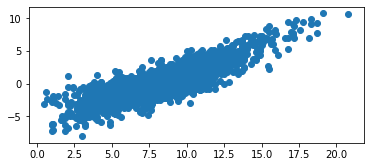

In [32]:
fig, ax = plt.subplots(figsize=(6,2.5))
ax.scatter(dfpcat['Diabetes'],residual)
# Residuals are not randomly distributed 

In [ ]:
# Checking for normality - residuals distribution is close to normal but skewed 

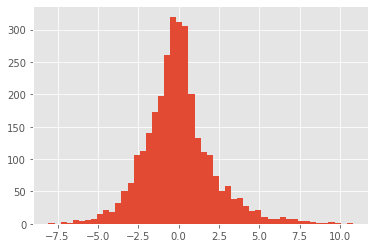

In [43]:
residual.hist(bins=50)

0.9523990893322951

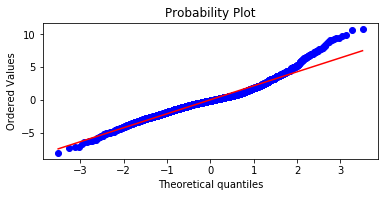

In [33]:
import scipy as sp
fig, ax = plt.subplots(figsize=(6,2.5))
sp.stats.probplot(residual, plot=ax, fit=True)
residual**2
0.9523990893322951

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1e4e6be0>,
      dtype=object)

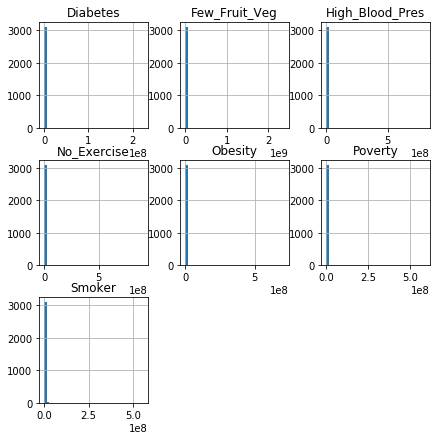

In [24]:
# Check independent variable distributions
dfabsw.hist(bins=40, figsize=[7,7])

In [ ]:
dfabsw

#### Log transformations

In [29]:
dfabsw_log = dfabsw.copy(deep=True)

In [30]:
dfabsw_log.columns

Index(['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity',
       'High_Blood_Pres', 'Smoker', 'Diabetes'],
      dtype='object')

In [31]:
log_list = ['Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity',
        'High_Blood_Pres', 'Smoker', 'Diabetes']

Poverty:0
No_Exercise:0
Few_Fruit_Veg:0
Obesity:0
High_Blood_Pres:0
Smoker:0
Diabetes:0


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c1f747048>,
      dtype=object)

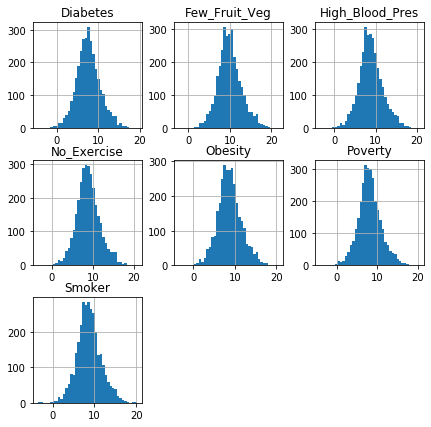

In [32]:
# Transform the variables to see how it affects the model

for col in log_list:
    print(f'{col}:{(dfabsw_log[col] == 0).sum()}')
    dfabsw_log[col] = np.log(dfabsw_log[col])
dfabsw_log.hist(bins=40, figsize=[7,7])
# dfp_log['Poverty'] = np.log(dfp_log['Poverty'])
# dfpcat_log['High_Blood_Pres'] = np.log(dfpcat_log['High_Blood_Pres'])

In [34]:
formula = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
absw_log_model = ols(formula= formula, data=dfabsw_log ).fit()
absw_log_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 4.527e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        02:22:38   Log-Likelihood:                -739.00
No. Observations:                3113   AIC:                             1492.
Df Residuals:                    3106   BIC:                             1534.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7894      0.052    -15.296      0.000      -0.891      -0.688
Poverty             0.1553      0.018      8.697      0.000       0.120       0.190
No_Exercise         0.1798      0.034      5.287      0.000       0.113       0.247
Few_Fruit_Veg      -0.2937      0.038     -7.715      0.000      -0.368      -0.219
Obesity             0.5581      0.036     15.583      0.000       0.488       0.628
High_Blood_Pres     0.4069      0.040     10.178      0.000       0.329       0.485
Smoker             -0.0046      0.027     -0.173      0.863      -0.057       0.048
==============================================================================
Omnibus:                      759.317   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3730.873
Skew:                          -1.080   Prob(JB):                         0.00
Kurtosis:                       7.909   Cond. No.                         281.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

## Check for multicollinearity

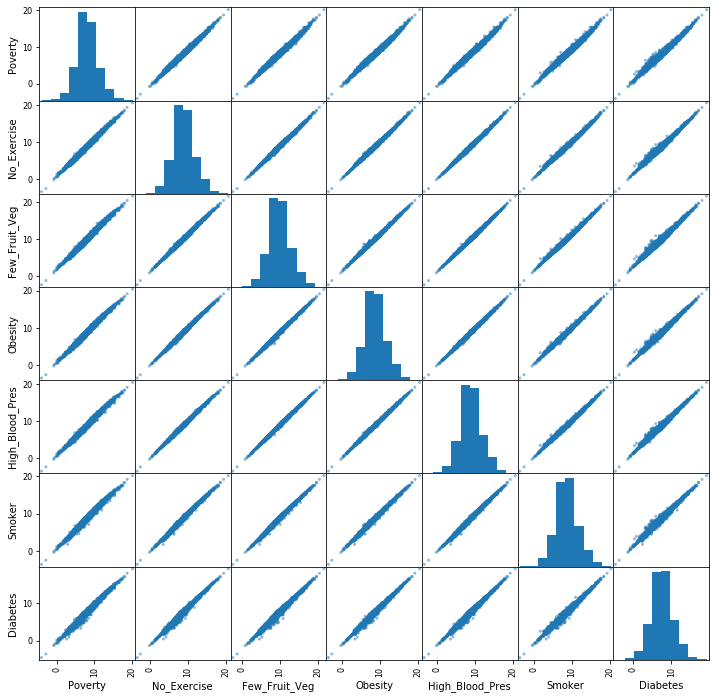

In [40]:
pd.plotting.scatter_matrix(dfabsw_log, figsize = [12,12])
plt.show()

In [42]:
dfabsw_log.corr()

NameError: name 'chol' is not defined

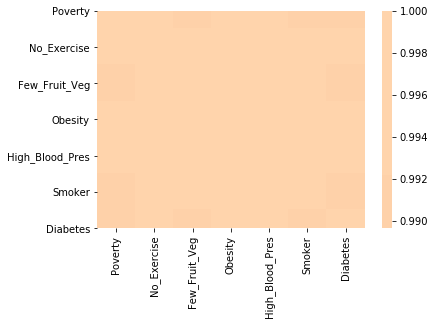

In [41]:
sns.heatmap(dfabsw_log.corr(), center=0);

#### Perform a test split

In [111]:
from sklearn.model_selection import train_test_split
import sklearn.metrics as metrics
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score

In [77]:
# y = dfp['Diabetes']
# X = dfp[[ 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker']]

In [115]:
y = dfpcat['Diabetes']
X = dfpcat[[ 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker','Northeast','South','West']]


In [116]:
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [117]:
print(len(X_train), len(X_test), len(y_train), len(y_test))

2334 779 2334 779


In [118]:
# linreg = LinearRegression()
# linreg.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [119]:
# # Calculate predictions on training and test sets
# y_hat_train = linreg.predict(X_train)
# y_hat_test = linreg.predict(X_test)
# # Calculate training and test residuals
# train_residuals = y_hat_train - y_train
# test_residuals = y_hat_test - y_test
# # Calculate the Mean Squared Error (MSE)
# train_mse = metrics.mean_squared_error(y_train, y_hat_train)
# test_mse = metrics.mean_squared_error(y_test, y_hat_test)
# print('Train Mean Squarred Error:', train_mse)
# print('Training r^2:', linreg.score(X_train, y_train))
# print('Test Mean Squarred Error:', test_mse)
# print('Test r^2:', linreg.score(X_test, y_test))

Train Mean Squarred Error: 4.866463918777828
Training r^2: 0.29794981355571004
Test Mean Squarred Error: 4.337360756018332
Test r^2: 0.3307590601079671


In [120]:
# # perform a k-fold cross-validation
# cv_10 = cross_val_score(linreg, X, y, cv=10, scoring='neg_mean_squared_error')
# cv_10

array([-5.17036651, -4.88576353, -5.17081384, -5.18225237, -5.06858038,
       -3.89543232, -5.84288214, -4.20810592, -3.6102694 , -5.2420793 ])

In [121]:
# cv_10_r2 = cross_val_score(linreg, X, y, cv=10, scoring='r2')
# cv_10_r2

array([0.44716136, 0.24303098, 0.13503192, 0.06249144, 0.34580353,
       0.2799835 , 0.20554068, 0.30721855, 0.25414537, 0.36689751])

#### Perform a k-fold cross-validation

In [122]:
from sklearn.model_selection import KFold

In [152]:
kfold = KFold(10, True)
b_model = LinearRegression()

In [158]:
cv_10_cv_r2 = cross_val_score(b_model, X, y, scoring='r2', cv=kfold)
print(f' R-squared of the model (mean of 10-fold cross-validation): {cv_10_cv_r2.mean()}')
baseline = cv_10_cv_r2.mean()
cv_10_cv_r2

 R-squared of the model (mean of 10-fold cross-validation): 0.30294522838879195


array([0.25694141, 0.27605558, 0.39152669, 0.3015339 , 0.29976963,
       0.33253906, 0.32504269, 0.2567632 , 0.31256946, 0.27671066])

In [159]:
cv_10_cv_mse = cross_val_score(b_model, X, y, scoring='neg_mean_squared_error', cv=kfold)
print(f' MSE of the model (mean of 10-fold cross-validation): {cv_10_cv_mse.mean()}')
cv_10_cv_mse

 MSE of the model (mean of 10-fold cross-validation): -4.770525761730887


array([-3.95810479, -5.1390288 , -4.44759467, -4.14236163, -4.578035  ,
       -4.51342553, -4.42781207, -4.54772696, -5.42375295, -6.52741522])

### Check for interactions

In [144]:
dfpcat.columns

Index(['County_index', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity',
       'High_Blood_Pres', 'Smoker', 'Diabetes', 'Northeast', 'South', 'West'],
      dtype='object')

In [161]:
X_int = X.copy(deep=True)

In [163]:
from itertools import combinations
combinations = list(combinations(X_int.columns.values, 2))

interactions = []
for comb in combinations:
    X_int['interaction'] = X_int[comb[0]] * X_int[comb[1]]
    score = np.mean(cross_val_score(b_model, X_int, y, scoring='r2', cv=kfold))
    if score > baseline:
        interactions.append((comb[0], comb[1], round(score, 3)))
            
print('Top 7 interactions: %s' %sorted(interactions, key=lambda inter: inter[2], reverse=True)[:7])

Top 7 interactions: [('No_Exercise', 'High_Blood_Pres', 0.306), ('Obesity', 'High_Blood_Pres', 0.306), ('No_Exercise', 'Few_Fruit_Veg', 0.304), ('No_Exercise', 'Obesity', 0.304), ('No_Exercise', 'Smoker', 0.304), ('Few_Fruit_Veg', 'High_Blood_Pres', 0.304), ('Smoker', 'South', 0.304)]


In [91]:
model = LinearRegression()
model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [92]:
y_pred = model.predict(X)

In [94]:
metrics.r2_score(y, y_pred)

0.3075918340110265

In [93]:
def regression_results(y_true, y_pred):

    # Regression metrics
    explained_variance=metrics.explained_variance_score(y_true, y_pred)
    mean_absolute_error=metrics.mean_absolute_error(y_true, y_pred) 
    mse=metrics.mean_squared_error(y_true, y_pred) 
    mean_squared_log_error=metrics.mean_squared_log_error(y_true, y_pred)
    median_absolute_error=metrics.median_absolute_error(y_true, y_pred)
    r2=metrics.r2_score(y_true, y_pred)

    print('explained_variance: ', round(explained_variance,4))    
    print('mean_squared_log_error: ', round(mean_squared_log_error,4))
    print('r2: ', round(r2,4))
    print('MAE: ', round(mean_absolute_error,4))
    print('MSE: ', round(mse,4))
    print('RMSE: ', round(np.sqrt(mse),4))

In [90]:
regression_results(y, y_pred)

explained_variance:  0.3068
mean_squared_log_error:  0.0679
r2:  0.3067
MAE:  1.5684
MSE:  4.7364
RMSE:  2.1763


In [95]:
regression_results(y, y_pred)

explained_variance:  0.3076
mean_squared_log_error:  0.0675
r2:  0.3076
MAE:  1.5629
MSE:  4.73
RMSE:  2.1749


In [189]:
y_log = dfpcat_log['Diabetes']
X_log = dfpcat_log[[ 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 'Smoker','Northeast','South','West']]


In [190]:
# kfold = KFold(10, True)
# b_model = LinearRegression()

cv_10_cv_r2_log = cross_val_score(b_model, X_log, y_log, scoring='r2', cv=kfold)
print(f' R-squared of the model (mean of 10-fold cross-validation): {cv_10_cv_r2_log.mean()}')
baseline_log = cv_10_cv_r2.mean()
cv_10_cv_r2

 R-squared of the model (mean of 10-fold cross-validation): 0.3025205033932109


array([0.25694141, 0.27605558, 0.39152669, 0.3015339 , 0.29976963,
       0.33253906, 0.32504269, 0.2567632 , 0.31256946, 0.27671066])

In [191]:
cv_10_cv_mse_log = cross_val_score(b_model, X_log, y_log, scoring='neg_mean_squared_error', cv=kfold)
print(f' MSE of the model (mean of 10-fold cross-validation): {cv_10_cv_mse_log.mean()}')
cv_10_cv_mse

 MSE of the model (mean of 10-fold cross-validation): -4.737566133904944


array([-3.95810479, -5.1390288 , -4.44759467, -4.14236163, -4.578035  ,
       -4.51342553, -4.42781207, -4.54772696, -5.42375295, -6.52741522])

Uninsured and Poverty are correlated, so for now we will drop uninsured

In [ ]:
df_X = df_X.drop('Uninsured', axis=1)

In [ ]:
formula2 = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
model2 = ols(formula= formula2, data=main_df).fit()

In [ ]:
model2.summary()

## Scaling / Normalization / Standardization

In [ ]:
df_X_copy = df_X.copy(deep=True)

Converting the values to proportions earlier took care of outliers and the distributions are pretty normal but still cound be made better with log transform

In [ ]:
df_X['Poverty'] = df_X['Poverty'].map(lambda x: np.log(x))

In [ ]:
df_X['No_Exercise'] = df_X['No_Exercise'].map(lambda x: np.log(x))

In [ ]:
df_X['Few_Fruit_Veg'] = df_X['Few_Fruit_Veg'].map(lambda x: np.log(x))

In [ ]:
df_X['Obesity'] = df_X['Obesity'].map(lambda x: np.log(x))

In [ ]:
df_X['High_Blood_Pres'] = df_X['High_Blood_Pres'].map(lambda x: np.log(x))

In [ ]:
df_X['Smoker'] = df_X['Smoker'].map(lambda x: np.log(x))

In [ ]:
# for col in df_X.columns:
pd.plotting.scatter_matrix(df_X, figsize=(10,12));

In [ ]:
logged_df = pd.concat([df_Y, df_X], axis=1)

In [ ]:
model3 = ols(formula= formula2, data=logged_df).fit()
model3.summary()

In [ ]:
residuals = model.resid
fig = sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)
fig.show()

In [ ]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model, "Obesity", fig=fig)
plt.show()

In [ ]:
from sklearn.preprocessing import StandardScaler

ss = StandardScaler()
transformed = scale.fit_transform(df_X)
X = pd.DataFrame(transformed, columns = df_X.columns)

In [ ]:
log_scale_df = pd.concat([df_Y, X], axis=1)

In [ ]:
model4 = ols(formula= formula2, data=log_scale_df).fit()
model4.summary()

In [ ]:
scale = MinMaxScaler()
transformed = scale.fit_transform(X)
X = pd.DataFrame(transformed, columns = df_X.columns)

In [ ]:
# implementation 
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso, Ridge, LinearRegression
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#data = pd.read_csv("https://raw.githubusercontent.com/learn-co-curriculum/dsc-2-24-09-ridge-and-lasso-regression/master/auto-mpg.csv") 
data = risk_df.sample(50)
data.isna()
y = df_Y.as_matrix()
X = X.as_matrix()


In [ ]:
 # Perform t`est train split
X_train , X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=12)

# Build a Ridge, Lasso and regular linear regression model. 
# Note how in scikit learn, the regularization parameter is denoted by alpha (and not lambda)
ridge = Ridge(alpha=.5)
ridge.fit(X_train, y_train)

lasso = Lasso(alpha=.5)
lasso.fit(X_train, y_train)

lin = LinearRegression()
lin.fit(X_train, y_train)

In [ ]:
print("Unpenalized Linear Regression Coefficients are:{}".format(lin.coef_))
print("Unpenalized Linear Regression Intercept:{}".format(lin.intercept_))

In [ ]:
print("Lasso Regression Coefficients are:{}".format(lasso.coef_))
print("Lasso Linear Regression Intercept:{}".format(lasso.intercept_))

In [ ]:
print("Ridge Regression Coefficients are:{}".format(ridge.coef_))
print("Ridge Linear Regression Intercept:{}".format(ridge.intercept_))

In [ ]:
# create predictions
y_h_ridge_train = ridge.predict(X_train)
y_h_ridge_test = ridge.predict(X_test)

y_h_lasso_train = np.reshape(lasso.predict(X_train),(2490,1))
y_h_lasso_test = np.reshape(lasso.predict(X_test),(623,1))

y_h_lin_train = lin.predict(X_train)
y_h_lin_test = lin.predict(X_test)

In [ ]:
# examine the residual sum of sq
print('Train Error Ridge Model', np.sum((y_train - y_h_ridge_train)**2))
print('Test Error Ridge Model', np.sum((y_test - y_h_ridge_test)**2))
print('\n')

print('Train Error Lasso Model', np.sum((y_train - y_h_lasso_train)**2))
print('Test Error Lasso Model', np.sum((y_test - y_h_lasso_test)**2))
print('\n')

print('Train Error Unpenalized Linear Model', np.sum((y_train - lin.predict(X_train))**2))
print('Test Error Unpenalized Linear Model', np.sum((y_test - lin.predict(X_test))**2))

In [ ]:
# formula = "Diabetes ~ No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres+Smoker"
model = ols(formula= formula2, data=log_scale_df).fit()

In [ ]:
model.summary()

In [43]:
def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

In [44]:
dfabsw
dfabsw_log

,County_index,Poverty,No_Exercise,Few_Fruit_Veg,Obesity,High_Blood_Pres,Smoker,Diabetes
0,"Autauga, AL",8291.381047,22163.499336,62663.706757,19532.580350,23199.921967,21206.801523,11320.924121
1,"Baldwin, AL",90964.727216,242572.605910,679560.020968,210467.408069,272002.370598,219385.518580,64210.395682
2,"Barbour, AL",6019.543852,8115.489099,21811.994194,6972.865277,8607.130576,4821.082633,1797.691829
3,"Bibb, AL",2623.849432,4653.428203,13525.319094,4200.901790,4935.335836,3720.699188,2045.977831
4,"Blount, AL",12466.762111,35095.506782,78152.979281,25352.575048,33105.015352,24723.998807,8800.067372
...,...,...,...,...,...,...,...,...
3108,"Sweetwater, WY",4184.085716,10654.822928,39262.292709,11481.909640,11044.040204,13330.691700,2578.564453
3109,"Teton, WY",684.326632,1173.131369,8407.441478,1099.810658,2309.602383,1674.156225,293.282842
3110,"Uinta, WY",1421.736682,3138.550788,11145.879082,3044.662517,3017.837296,2897.123805,643.805290
3111,"Washakie, WY",235.670077,492.571693,1658.183156,447.985462,590.236770,418.261308,199.576462


In [45]:
y_log = dfabsw_log['Diabetes']
X_log = dfabsw_log[[ 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 
                    'Smoker']]

In [46]:
y = dfabsw['Diabetes']
X = dfabsw[[ 'Poverty', 'No_Exercise', 'Few_Fruit_Veg', 'Obesity', 'High_Blood_Pres', 
                    'Smoker']]

In [47]:
stepwise_selection(X, y, verbose=True)

/Users/regi/miniconda3/lib/python3.7/site-packages/numpy/core/fromnumeric.py:2495: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


Add  Obesity                        with p-value 0.0
Add  No_Exercise                    with p-value 0.0
Add  Smoker                         with p-value 4.7348e-114
Add  Few_Fruit_Veg                  with p-value 1.28494e-63
Add  High_Blood_Pres                with p-value 1.00048e-228
Drop Obesity                        with p-value 0.129428
Add  Poverty                        with p-value 2.79127e-06


/Users/regi/miniconda3/lib/python3.7/site-packages/ipykernel_launcher.py:43: FutureWarning: 
The current behaviour of 'Series.argmax' is deprecated, use 'idxmax'
instead.
The behavior of 'argmax' will be corrected to return the positional
maximum in the future. For now, use 'series.values.argmax' or
'np.argmax(np.array(values))' to get the position of the maximum
row.


['No_Exercise', 'Smoker', 'Few_Fruit_Veg', 'High_Blood_Pres', 'Poverty']

In [48]:
stepwise_selection(X_log, y_log, verbose=True)

Add  Obesity                        with p-value 0.0
Add  Poverty                        with p-value 2.40234e-46
Add  High_Blood_Pres                with p-value 9.66373e-23
Add  Few_Fruit_Veg                  with p-value 3.53157e-14
Add  No_Exercise                    with p-value 6.58025e-08


['Obesity', 'Poverty', 'High_Blood_Pres', 'Few_Fruit_Veg', 'No_Exercise']

In [49]:

X_select_log = dfabsw_log[[ 'Obesity', 'High_Blood_Pres', 'Poverty', 'No_Exercise', 'Few_Fruit_Veg']]

In [50]:
formula_cat = "Diabetes ~ Poverty+No_Exercise+Few_Fruit_Veg+Obesity+High_Blood_Pres"
cat_model_select = ols(formula= formula_cat, data=dfabsw_log).fit()
cat_model_select.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Diabetes   R-squared:                       0.989
Model:                            OLS   Adj. R-squared:                  0.989
Method:                 Least Squares   F-statistic:                 5.434e+04
Date:                Mon, 02 Dec 2019   Prob (F-statistic):               0.00
Time:                        09:32:41   Log-Likelihood:                -739.01
No. Observations:                3113   AIC:                             1490.
Df Residuals:                    3107   BIC:                             1526.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept          -0.7865      0.049    -16.097      0.000      -0.882      -0.691
Poverty             0.1553      0.018      8.697      0.000       0.120       0.190
No_Exercise         0.1784      0.033      5.415      0.000       0.114       0.243
Few_Fruit_Veg      -0.2953      0.037     -7.999      0.000      -0.368      -0.223
Obesity             0.5575      0.036     15.647      0.000       0.488       0.627
High_Blood_Pres     0.4060      0.040     10.252      0.000       0.328       0.484
==============================================================================
Omnibus:                      759.379   Durbin-Watson:                   1.971
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3733.143
Skew:                          -1.080   Prob(JB):                         0.00
Kurtosis:                       7.911   Cond. No.                         250.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""